In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


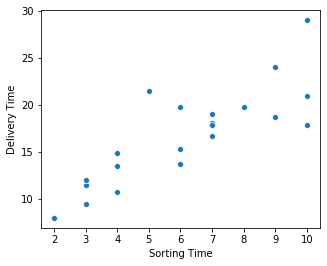

In [5]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x='Sorting Time', y='Delivery Time')
plt.show()

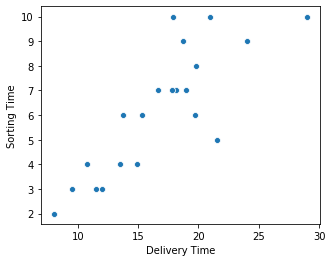

In [6]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x='Delivery Time', y='Sorting Time')
plt.show()

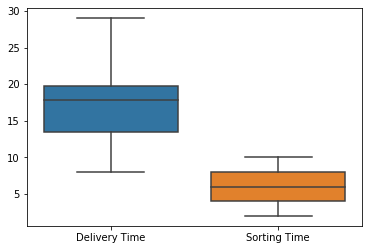

In [7]:
sns.boxplot(data=df)
plt.show()

In [8]:
# the above boxplots says there are no outliers in the dataset

In [9]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


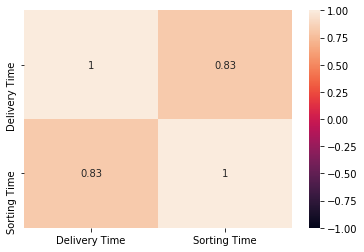

In [10]:
sns.heatmap(data=df.corr(),
            annot=True,
            vmin=-1,
            vmax=1,)
plt.show()

In [11]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:
# from both corr function and heatmap, we can conclude that both are highly correlated to each other.

In [13]:
corr,_ = pearsonr(df['Delivery Time'],df['Sorting Time'])
print('Pearsons correlation : %.3f ' % corr)

Pearsons correlation : 0.826 


In [14]:
results = pd.DataFrame(columns = ['Name','rsquared','RMSE'])

In [15]:
import scipy.stats as sc #scientific python
import statsmodels.api as sm

from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

## With Constants

In [16]:
df1 = pd.DataFrame()

In [17]:
df1['Sorting Time'] = df['Sorting Time']
df1['Delivery Time'] = df['Delivery Time']

Let's separate the X and y values and then we can use the Simple Linear Regression algorithm.

In [18]:
X = df1['Sorting Time']
y = df1['Delivery Time']

In [19]:
X.head()

0    10
1     4
2     6
3     9
4    10
Name: Sorting Time, dtype: int64

In [20]:
y.head()

0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: Delivery Time, dtype: float64

In [21]:
X = sm.add_constant(X)
X.head()

,const,Sorting Time
0,1.0,10
1,1.0,4
2,1.0,6
3,1.0,9
4,1.0,10


In [22]:
LinearRegression1 = sm.OLS(y,X).fit()
LinearRegression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        00:33:13   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
LinearRegression1.rsquared*100

68.2271474841723

In [24]:
df1['ypred'] = LinearRegression1.predict(X)
df1.head()

,Sorting Time,Delivery Time,ypred
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933


In [25]:
rmse_df_linear_regression_1 = np.sqrt(mean_squared_error(y,df1['ypred']))
rmse_df_linear_regression_1

2.7916503270617654

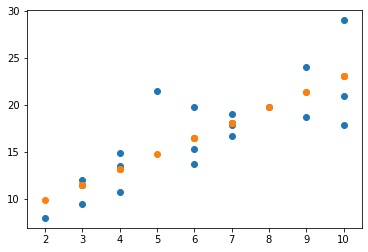

In [26]:
plt.scatter(df1['Sorting Time'],df1['Delivery Time'])
plt.scatter(df1['Sorting Time'],df1['ypred'])
plt.show()

In [27]:
results = results.append({'Name' : 'With Constants', 'rsquared' : LinearRegression1.rsquared*100, 'RMSE' : rmse_df_linear_regression_1}, ignore_index = True)
results

,Name,rsquared,RMSE
0,With Constants,68.227147,2.79165


## Without constants

In [28]:
df2 = pd.DataFrame()

In [29]:
df2['Sorting Time'] = df['Sorting Time']
df2['Delivery Time'] = df['Delivery Time']

In [30]:
X = df2['Sorting Time']
y = df2['Delivery Time']

In [31]:
X.head()

0    10
1     4
2     6
3     9
4    10
Name: Sorting Time, dtype: int64

In [32]:
y.head()

0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: Delivery Time, dtype: float64

In [33]:
LinearRegression2 = sm.OLS(y,X).fit()
LinearRegression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    6.12e-15
Time:                        00:33:13   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
LinearRegression2.rsquared*100

95.5005401256664

In [35]:
df2['ypred'] = LinearRegression2.predict(X)
df2.head()

,Sorting Time,Delivery Time,ypred
0,10,21.00,25.652463
1,4,13.50,10.260985
2,6,19.75,15.391478
3,9,24.00,23.087216
4,10,29.00,25.652463


In [36]:
rmse_df_linear_regression_2 = np.sqrt(mean_squared_error(y,df2['ypred']))
rmse_df_linear_regression_2

3.713386295436734

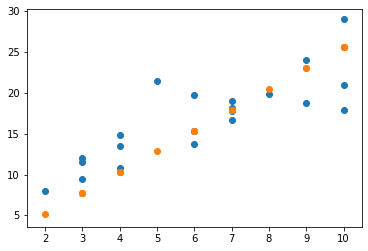

In [37]:
plt.scatter(df2['Sorting Time'],df2['Delivery Time'])
plt.scatter(df2['Sorting Time'],df2['ypred'])
plt.show()

In [38]:
results = results.append({'Name' : 'Without constants', 'rsquared' : LinearRegression2.rsquared*100, 'RMSE' : rmse_df_linear_regression_2}, ignore_index = True)
results

,Name,rsquared,RMSE
0,With Constants,68.227147,2.791650
1,Without constants,95.500540,3.713386


## Log Transformation

In [39]:
df3 = pd.DataFrame()

In [40]:
df3['Sorting Time'] = np.log(df['Sorting Time'])
df3['Delivery Time'] = np.log(df['Delivery Time'])

In [41]:
X = df3['Sorting Time']
y = df3['Delivery Time']

In [42]:
X.head()

0    2.302585
1    1.386294
2    1.791759
3    2.197225
4    2.302585
Name: Sorting Time, dtype: float64

In [43]:
y.head()

0    3.044522
1    2.602690
2    2.983153
3    3.178054
4    3.367296
Name: Delivery Time, dtype: float64

In [44]:
LinearRegression3_Log_transformation = sm.OLS(y,X).fit()
LinearRegression3_Log_transformation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    5.72e-17
Time:                        00:33:13   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
LinearRegression3_Log_transformation.rsquared*100

97.17801632741208

In [46]:
df3['ypred'] = LinearRegression3_Log_transformation.predict(X)
df3.head()

,Sorting Time,Delivery Time,ypred
0,2.302585,3.044522,3.545002
1,1.386294,2.602690,2.134304
2,1.791759,2.983153,2.758547
3,2.197225,3.178054,3.382791
4,2.302585,3.367296,3.545002


In [47]:
rmse_df_LinearRegression3_Log_transformation = np.sqrt(mean_squared_error(y,df3['ypred']))
rmse_df_LinearRegression3_Log_transformation

0.4690399796486248

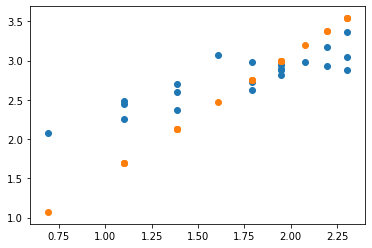

In [48]:
plt.scatter(df3['Sorting Time'],df3['Delivery Time'])
plt.scatter(df3['Sorting Time'],df3['ypred'])
plt.show()

In [49]:
results = results.append({'Name' : 'Log Transformation', 'rsquared' : LinearRegression3_Log_transformation.rsquared*100, 'RMSE' : rmse_df_LinearRegression3_Log_transformation}, ignore_index = True)
results

,Name,rsquared,RMSE
0,With Constants,68.227147,2.791650
1,Without constants,95.500540,3.713386
2,Log Transformation,97.178016,0.469040


## Square Transformation

In [50]:
df4 = pd.DataFrame()

In [51]:
df4['Sorting Time'] = df['Sorting Time']**2
df4['Delivery Time'] = df['Delivery Time']**2

In [52]:
X = df4['Sorting Time']
y = df4['Delivery Time']

In [53]:
X.head()

0    100
1     16
2     36
3     81
4    100
Name: Sorting Time, dtype: int64

In [54]:
y.head()

0    441.0000
1    182.2500
2    390.0625
3    576.0000
4    841.0000
Name: Delivery Time, dtype: float64

In [55]:
LinearRegression4_Square_transformation = sm.OLS(y,X).fit()
LinearRegression4_Square_transformation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              124.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    4.77e-10
Time:                        00:33:13   Log-Likelihood:                         -132.28
No. Observations:                  21   AIC:                                      266.6
Df Residuals:                      20   BIC:                                      267.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     6.0336      0.540     11.170      0.000       4.907       7.160
==============================================================================
Omnibus:                        2.882   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                1.206
Skew:                          -0.360   Prob(JB):                        0.547
Kurtosis:                       3.927   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
LinearRegression4_Square_transformation.rsquared*100

86.1848388205904

In [57]:
df4['ypred'] = LinearRegression4_Square_transformation.predict(X)
df4.head()

,Sorting Time,Delivery Time,ypred
0,100,441.0000,603.357906
1,16,182.2500,96.537265
2,36,390.0625,217.208846
3,81,576.0000,488.719904
4,100,841.0000,603.357906


In [58]:
rmse_df_LinearRegression4_Square_transformation = np.sqrt(mean_squared_error(y,df4['ypred']))
rmse_df_LinearRegression4_Square_transformation

131.64001373195575

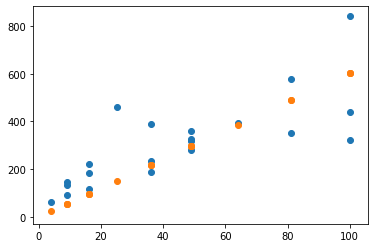

In [59]:
plt.scatter(df4['Sorting Time'],df4['Delivery Time'])
plt.scatter(df4['Sorting Time'],df4['ypred'])
plt.show()

In [60]:
results = results.append({'Name' : 'Square Transformation', 'rsquared' : LinearRegression4_Square_transformation.rsquared*100, 'RMSE' : rmse_df_LinearRegression4_Square_transformation}, ignore_index = True)
results

,Name,rsquared,RMSE
0,With Constants,68.227147,2.791650
1,Without constants,95.500540,3.713386
2,Log Transformation,97.178016,0.469040
3,Square Transformation,86.184839,131.640014


## Square Root Transformation

In [61]:
df5 = pd.DataFrame()

In [62]:
df5['Sorting Time'] = np.sqrt(df['Sorting Time'])
df5['Delivery Time'] = np.sqrt(df['Delivery Time'])

In [63]:
X = df5['Sorting Time']
y = df5['Delivery Time']

In [64]:
X.head()

0    3.162278
1    2.000000
2    2.449490
3    3.000000
4    3.162278
Name: Sorting Time, dtype: float64

In [65]:
y.head()

0    4.582576
1    3.674235
2    4.444097
3    4.898979
4    5.385165
Name: Delivery Time, dtype: float64

In [66]:
LinearRegression5_Sqrt_transformation = sm.OLS(y,X).fit()
LinearRegression5_Sqrt_transformation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    2.10e-20
Time:                        00:33:14   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
LinearRegression5_Sqrt_transformation.rsquared*100

98.71948808975024

In [68]:
df5['ypred'] = LinearRegression5_Sqrt_transformation.predict(X)
df5.head()

,Sorting Time,Delivery Time,ypred
0,3.162278,4.582576,5.174604
1,2.000000,3.674235,3.272707
2,2.449490,4.444097,4.008231
3,3.000000,4.898979,4.909060
4,3.162278,5.385165,5.174604


In [69]:
rmse_df_LinearRegression5_Sqrt_transformation = np.sqrt(mean_squared_error(y,df5['ypred']))
rmse_df_LinearRegression5_Sqrt_transformation

0.4636918643694985

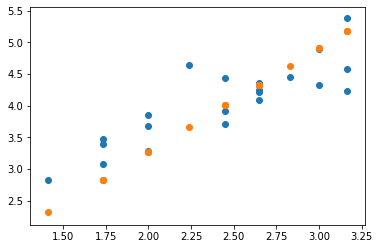

In [70]:
plt.scatter(df5['Sorting Time'],df5['Delivery Time'])
plt.scatter(df5['Sorting Time'],df5['ypred'])
plt.show()

In [71]:
results = results.append({'Name' : 'Square Root Transformation', 'rsquared' : LinearRegression5_Sqrt_transformation.rsquared*100, 'RMSE' : rmse_df_LinearRegression5_Sqrt_transformation}, ignore_index = True)
results

,Name,rsquared,RMSE
0,With Constants,68.227147,2.791650
1,Without constants,95.500540,3.713386
2,Log Transformation,97.178016,0.469040
3,Square Transformation,86.184839,131.640014
4,Square Root Transformation,98.719488,0.463692


In [72]:
results.RMSE.min()

0.4636918643694985

In [73]:
for i in results['RMSE']:
    if i == results['RMSE'].min():
        print(i)
        idxm = results[['RMSE']].idxmin()
        print(idxm)

0.4636918643694985
RMSE    4
dtype: int64


## From all the results we conclude "Square Root Transformation" is the best and RMSE we got is 0.463 and R-Squared is 98.7194%